In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data

## Import data

In [ ]:
sangrur_file = '/content/drive/MyDrive/Sangrur_sorted_sept.xlsx'
sangrur_yield = pd.read_excel(sangrur_file,sheet_name=1)

## Take a quick look at the *data*

In [ ]:
sangrur_yield.head()

,NEWUID,Plot_no,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep,Yield (t/ha),Milling,Moisture
0,2111991.0,355.0,0.73625,4.42350,3.20750,0.300333,20.0915,1.891,5.32,3.5644,3.029740
1,2112451.0,461.0,0.71525,4.00025,2.36050,0.222000,20.1150,1.312,5.34,3.5778,3.041130
2,2112076.0,267.0,0.68000,3.37000,2.15575,0.168333,21.6660,2.740,5.37,3.5979,3.058215
3,2111925.0,563.0,0.69875,3.75125,2.19350,0.229333,19.4690,3.318,5.41,3.6247,3.080995
4,2112217.0,246.0,0.71775,3.75675,1.59375,0.217667,18.4380,1.868,5.46,3.6582,3.109470


In [ ]:
sangrur_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NEWUID         896 non-null    float64
 1   Plot_no        896 non-null    float64
 2   NDVI           896 non-null    float64
 3   GCVI           896 non-null    float64
 4   LAI            896 non-null    float64
 5   NDMI           896 non-null    float64
 6   AGDD           896 non-null    float64
 7   Tmax-Tmin_Sep  896 non-null    float64
 8   Yield (t/ha)   896 non-null    float64
 9   Milling        896 non-null    float64
 10  Moisture       896 non-null    float64
dtypes: float64(11)
memory usage: 77.1 KB


In [ ]:
sangrur_yield.describe()

,NEWUID,Plot_no,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep,Yield (t/ha),Milling,Moisture
count,8.960000e+02,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,2.112227e+06,342.450893,0.731511,4.147905,2.543584,0.245099,19.753495,2.005883,7.987946,5.351924,4.549135
std,1.866318e+02,162.125670,0.033143,0.482068,0.487774,0.046495,0.857812,0.840174,0.892191,0.597768,0.508103
min,2.111910e+06,2.000000,0.555000,2.333500,1.090000,0.086333,15.980000,0.292000,5.320000,3.564400,3.029740
25%,2.112061e+06,222.750000,0.713750,3.836000,2.207750,0.212667,19.140750,1.352000,7.400000,4.958000,4.214300
50%,2.112242e+06,368.500000,0.736375,4.152500,2.555750,0.244000,19.701750,1.952500,8.035000,5.383450,4.575933
75%,2.112403e+06,480.000000,0.753000,4.457375,2.858687,0.279083,20.354125,2.557000,8.700000,5.829000,4.954650
max,2.112500e+06,591.000000,0.809000,5.761750,4.019500,0.365000,23.462000,6.216000,10.080000,6.753600,5.740560


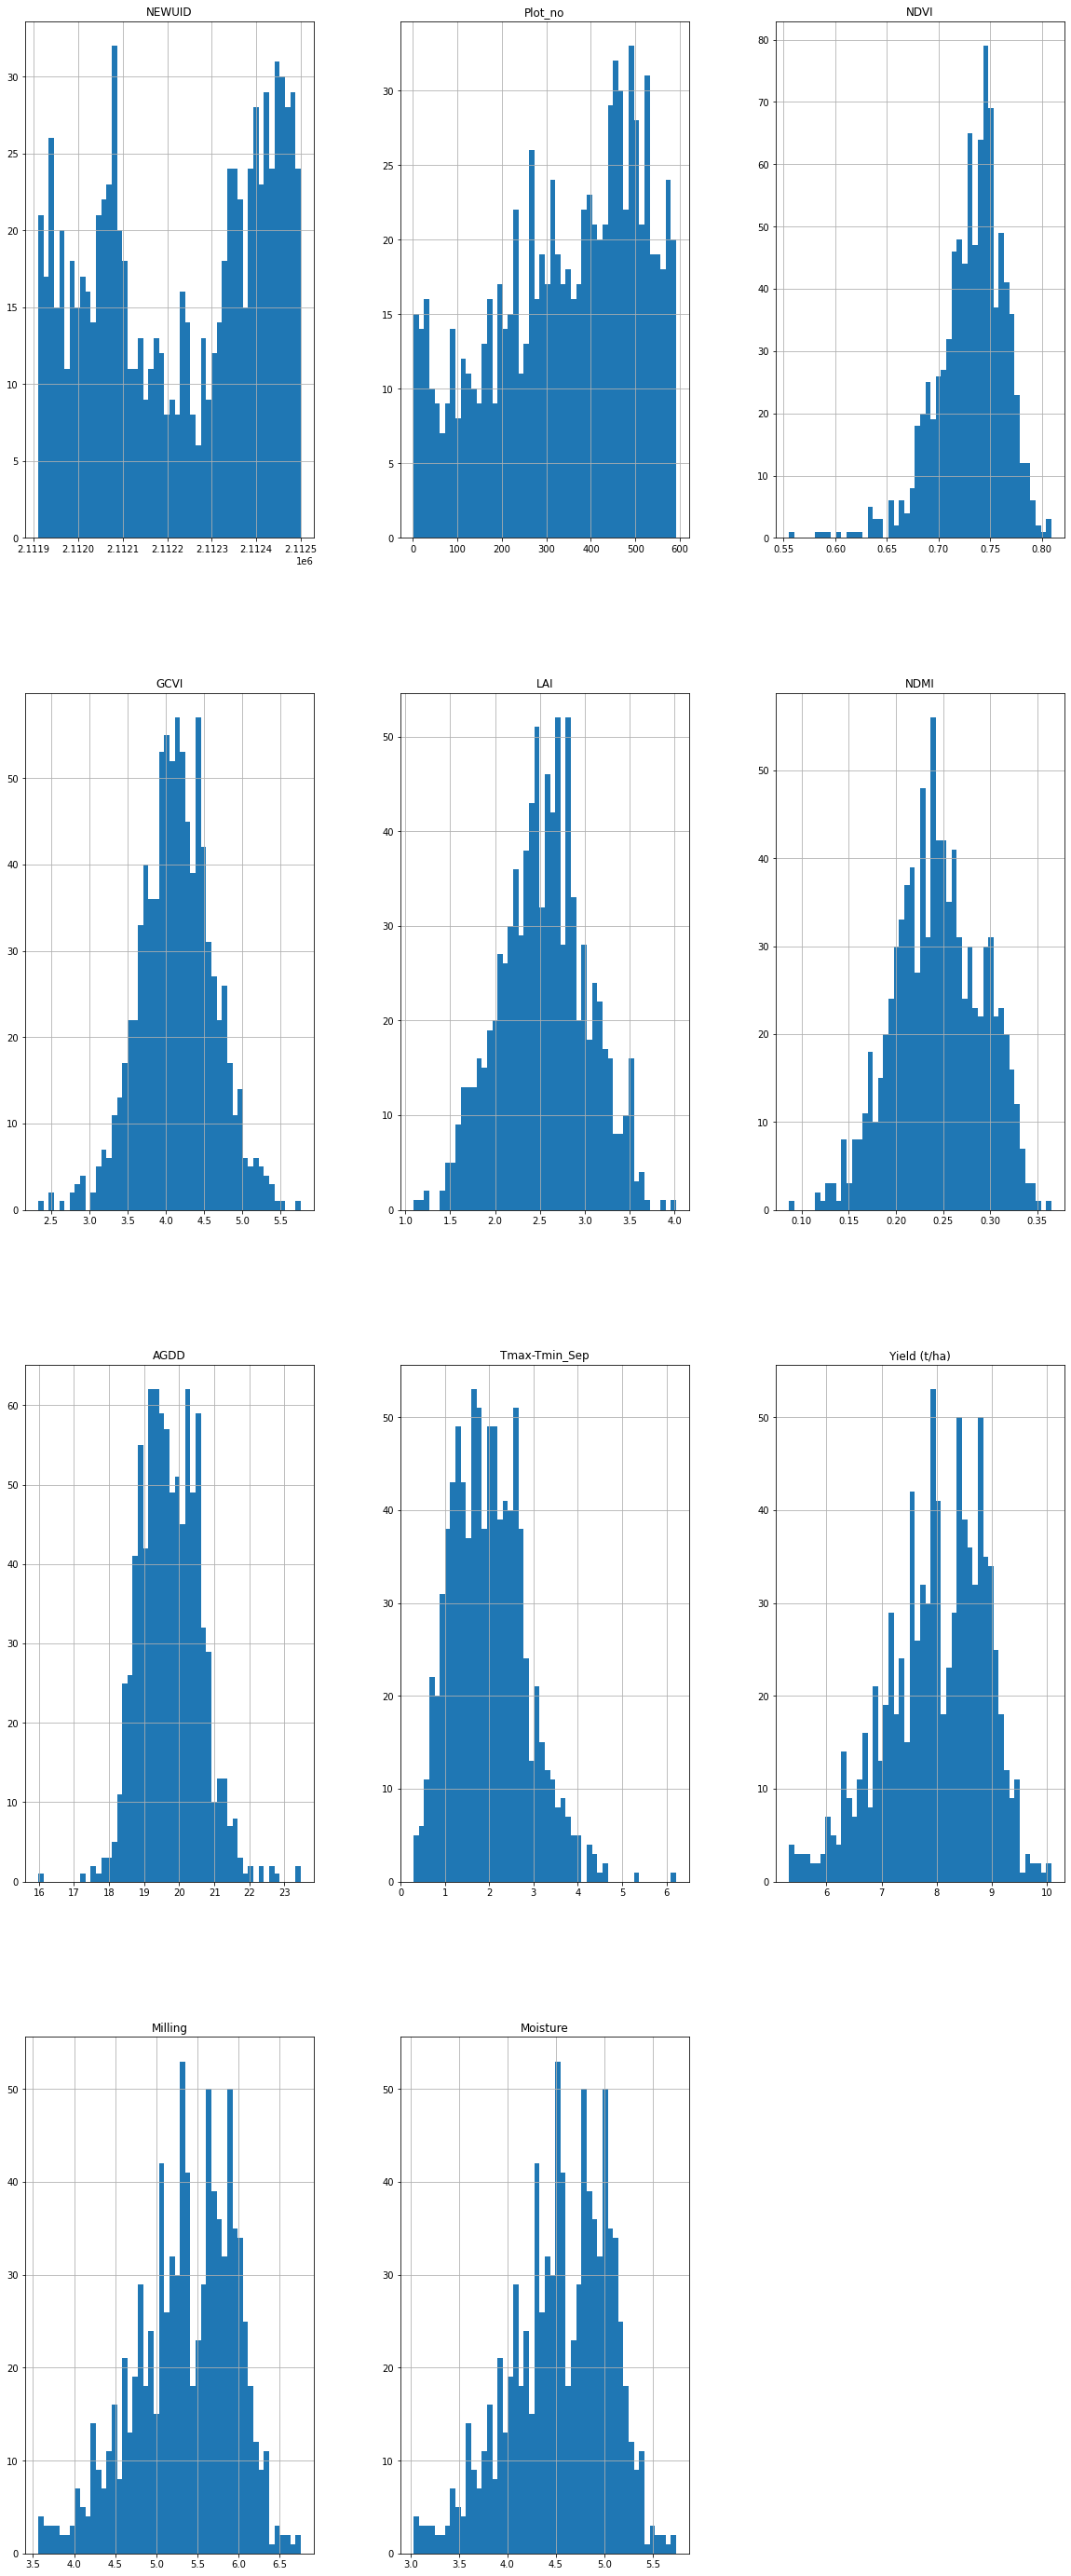

In [ ]:
sangrur_yield.hist(bins=50,figsize= (20,50))
plt.show()

## Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(sangrur_yield, test_size=0.2, random_state=42)

In [ ]:
train_set

,NEWUID,Plot_no,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep,Yield (t/ha),Milling,Moisture
736,2112407.0,272.0,0.73350,3.97100,2.88400,0.253333,19.5535,1.265,8.84,5.9228,5.034380
382,2112350.0,389.0,0.73250,3.96600,2.12700,0.214667,19.2570,1.618,7.92,5.3064,4.510440
706,2112245.0,39.0,0.73025,4.10225,2.41875,0.292667,18.9285,3.439,8.78,5.8826,5.000210
817,2112394.0,206.0,0.77625,5.14450,3.28350,0.310667,20.5120,0.626,9.06,6.0702,5.159670
118,2111977.0,329.0,0.72775,4.06325,2.01125,0.203333,19.2650,1.836,6.91,4.6297,3.935245
...,...,...,...,...,...,...,...,...,...,...,...
106,2112023.0,229.0,0.71225,3.76300,2.15775,0.234000,19.9235,1.093,6.88,4.6096,3.918160
270,2111940.0,580.0,0.67725,3.46400,2.87900,0.261667,19.2740,2.096,7.60,5.0920,4.328200
860,2112482.0,489.0,0.78100,5.29125,3.11400,0.294333,20.5430,0.876,9.27,6.2109,5.279265
435,2112327.0,341.0,0.75975,4.41200,2.23525,0.307333,18.8150,1.172,8.00,5.3600,4.556000


# Discover and Visulaize the Data to Gain Insights

In [ ]:
sangrur_yield = train_set.copy()

## Looking for Correlations

In [ ]:
corr_matrix = sangrur_yield.corr()

  How much each attribute correlates with the yield(t/ha)

In [ ]:
corr_matrix

,NEWUID,Plot_no,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep,Yield (t/ha),Milling,Moisture
NEWUID,1.000000,-0.013648,0.173472,0.141327,0.173913,0.233151,-0.051657,-0.116694,0.186548,0.186548,0.186548
Plot_no,-0.013648,1.000000,0.115163,0.153420,0.313990,0.002591,0.077793,0.007780,-0.275729,-0.275729,-0.275729
NDVI,0.173472,0.115163,1.000000,0.947184,0.491949,0.636710,-0.272215,-0.116686,0.269191,0.269191,0.269191
GCVI,0.141327,0.153420,0.947184,1.000000,0.516020,0.650998,-0.141667,-0.137064,0.286867,0.286867,0.286867
LAI,0.173913,0.313990,0.491949,0.516020,1.000000,0.369723,-0.033358,-0.168945,0.025549,0.025549,0.025549
NDMI,0.233151,0.002591,0.636710,0.650998,0.369723,1.000000,-0.254792,-0.036201,0.174312,0.174312,0.174312
AGDD,-0.051657,0.077793,-0.272215,-0.141667,-0.033358,-0.254792,1.000000,-0.113470,0.118636,0.118636,0.118636
Tmax-Tmin_Sep,-0.116694,0.007780,-0.116686,-0.137064,-0.168945,-0.036201,-0.113470,1.000000,-0.040364,-0.040364,-0.040364
Yield (t/ha),0.186548,-0.275729,0.269191,0.286867,0.025549,0.174312,0.118636,-0.040364,1.000000,1.000000,1.000000
Milling,0.186548,-0.275729,0.269191,0.286867,0.025549,0.174312,0.118636,-0.040364,1.000000,1.000000,1.000000


In [ ]:
corr_matrix['Moisture'].sort_values(ascending=False)

Moisture         1.000000
Milling          1.000000
Yield (t/ha)     1.000000
GCVI             0.286867
NDVI             0.269191
NEWUID           0.186548
NDMI             0.174312
AGDD             0.118636
LAI              0.025549
Tmax-Tmin_Sep   -0.040364
Plot_no         -0.275729
Name: Moisture, dtype: float64

From corelation coeff. , GCVI  is promising to predict yield

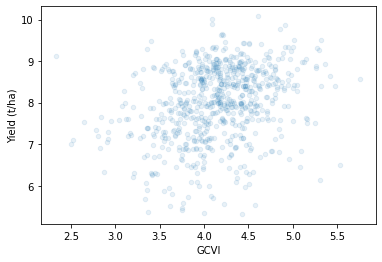

In [ ]:
sangrur_yield.plot(kind="scatter", x="GCVI", y="Yield (t/ha)", alpha=0.1)

# Prepare the data

Separate predictors and the target values

In [ ]:
train_set.columns

Index(['NEWUID', 'Plot_no', 'NDVI', 'GCVI', 'LAI', 'NDMI', 'AGDD',
       'Tmax-Tmin_Sep', 'Yield (t/ha)', 'Milling', 'Moisture'],
      dtype='object')

In [ ]:
sangrur_yield = train_set.drop(['NEWUID', 'Plot_no', 'Milling','Yield (t/ha)', 'Moisture'],axis =1)
sangrur_yield_labels = train_set['Moisture'].copy()

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(sangrur_yield)

StandardScaler()

In [ ]:
sangrur_yield_prepared =scaler.transform(sangrur_yield)

In [ ]:
sangrur_yield_prepared

array([[ 0.07468472, -0.35524775,  0.69176421,  0.17658834, -0.25534755,
        -0.88697331],
       [ 0.04525069, -0.36545881, -0.84795252, -0.65440656, -0.59887794,
        -0.46426038],
       [-0.02097585, -0.08720755, -0.25454122,  1.02193964, -0.97948412,
         1.71636354],
       ...,
       [ 1.47280067,  2.34098144,  1.15957775,  1.05774467,  0.89110547,
        -1.35279577],
       [ 0.84732774,  0.54536734, -0.62777506,  1.33713571, -1.11098732,
        -0.9983396 ],
       [-0.61701476, -0.67025881,  0.3383616 , -0.95528921, -0.97716688,
        -1.04983155]])

In [ ]:
feature_list_sangrur_yield_prepared = ['NDVI','GCVI', 'LAI', 'NDMI', 'AGDD',
       'Tmax-Tmin_Sep']

In [ ]:
sangrur_yield_prepared.shape

(716, 6)

In [ ]:
np.count_nonzero(np.isnan(sangrur_yield_prepared))

0

In [ ]:
np.argwhere(np.isnan(sangrur_yield_prepared))

array([], shape=(0, 2), dtype=int64)

# Select and train a model

## Train a model

In [ ]:
sangrur_yield.describe()

,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,0.730963,4.144953,2.543895,0.245116,19.773890,2.005696
std,0.033998,0.490008,0.491993,0.046562,0.863700,0.835666
min,0.555000,2.333500,1.090000,0.086333,15.980000,0.292000
25%,0.714625,3.848562,2.205500,0.212917,19.158750,1.380000
50%,0.736375,4.154125,2.563625,0.244500,19.733500,1.950500
75%,0.752812,4.453313,2.855062,0.279417,20.373625,2.544500
max,0.806250,5.761750,4.019500,0.365000,23.462000,6.216000


In [ ]:
sangrur_yield_labels

736    5.034380
382    4.510440
706    5.000210
817    5.159670
118    3.935245
         ...   
106    3.918160
270    4.328200
860    5.279265
435    4.556000
102    3.906770
Name: Moisture, Length: 716, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(sangrur_yield_prepared, sangrur_yield_labels)


LinearRegression()

## Evaluate the model

In [ ]:
sangrur_yield_eval = sangrur_yield.iloc[:5]

In [ ]:
sangrur_yield_eval_prep = scaler.transform(sangrur_yield_eval)

In [ ]:
sangrur_yield_labels_eval = sangrur_yield_labels.iloc[:5]

In [ ]:
print("Prediction:\t", lin_reg.predict(sangrur_yield_eval_prep))

Prediction:	 [4.44721831 4.53080456 4.48451801 4.85141362 4.54468507]


In [ ]:
print("labels:\t\t", list(sangrur_yield_labels_eval))

labels:		 [5.03438, 4.51044, 5.00021, 5.15967, 3.935245]


Root mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
sangrur_yield_prediction = lin_reg.predict(sangrur_yield_prepared)
lin_mse = mean_squared_error(sangrur_yield_labels, sangrur_yield_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.47126748803196233

## Better evaluation using Cross-validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(sangrur_yield_prepared,sangrur_yield_labels)

RMSE

In [ ]:
sangrur_yield_prediction = forest_reg.predict(sangrur_yield_prepared)
forest_mse = mean_squared_error(sangrur_yield_labels, sangrur_yield_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.17577864353330355

In [ ]:
print("Prediction:\t", forest_reg.predict(sangrur_yield_eval_prep))

Prediction:	 [4.84149035 4.55416621 4.78874896 5.11838125 4.12892056]


In [ ]:
print("labels:\t\t", list(sangrur_yield_labels_eval))

labels:		 [5.03438, 4.51044, 5.00021, 5.15967, 3.935245]


In [ ]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(forest_reg, sangrur_yield_prepared, sangrur_yield_labels, scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


In [ ]:
display_scores(rmse_scores)

Scores: [0.49223366 0.47737794 0.47314272]
Mean: 0.480918107265596
Standard deviation: 0.008185990033863935


# Fine tune your model

## Grid Search

In [3]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
              {'n_estimators':[3,10,30,90,270,810],'max_features':[2,3,4,5,6]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4,5,6]},
]

In [ ]:
forest_reg  = RandomForestRegressor()
# print(forest_reg.get_params())

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv =3, scoring = 'neg_mean_squared_error')

In [ ]:
grid_search.fit(sangrur_yield_prepared,sangrur_yield_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 30, 90, 270, 810]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 270}

In [ ]:
cvres = grid_search.cv_results_  
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.5336266180086058 {'max_features': 2, 'n_estimators': 3}
0.49882941511522294 {'max_features': 2, 'n_estimators': 10}
0.48352341334831916 {'max_features': 2, 'n_estimators': 30}
0.47543600927268637 {'max_features': 2, 'n_estimators': 90}
0.4752914830908797 {'max_features': 2, 'n_estimators': 270}
0.4753626441808125 {'max_features': 2, 'n_estimators': 810}
0.5546644947630666 {'max_features': 3, 'n_estimators': 3}
0.49485223551475616 {'max_features': 3, 'n_estimators': 10}
0.47973571767798745 {'max_features': 3, 'n_estimators': 30}
0.48135829998799884 {'max_features': 3, 'n_estimators': 90}
0.4780184612760264 {'max_features': 3, 'n_estimators': 270}
0.4771901059058604 {'max_features': 3, 'n_estimators': 810}
0.5388228538854875 {'max_features': 4, 'n_estimators': 3}
0.5023425331111558 {'max_features': 4, 'n_estimators': 10}
0.48488965353930996 {'max_features': 4, 'n_estimators': 30}
0.48339215645416284 {'max_features': 4, 'n_estimators': 90}
0.48020517270759494 {'max_features': 4, 'n_esti

## Evauate the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_features= 2, n_estimators= 90)
forest_reg.fit(sangrur_yield_prepared,sangrur_yield_labels)

RandomForestRegressor(max_features=2, n_estimators=90)

In [ ]:
sangrur_yield_prediction = forest_reg.predict(sangrur_yield_prepared)
forest_mse = mean_squared_error(sangrur_yield_labels, sangrur_yield_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.17858302369923665

In [ ]:
print("Prediction:\t", forest_reg.predict(sangrur_yield_eval_prep))

Prediction:	 [4.87808389 4.5007585  4.86725832 5.10037872 4.1886725 ]


In [ ]:
print("labels:\t\t", list(sangrur_yield_labels_eval))

labels:		 [5.03438, 4.51044, 5.00021, 5.15967, 3.935245]


### Feature importance

In [ ]:
sangrur_yield_prepared

array([[ 0.07468472, -0.35524775,  0.69176421,  0.17658834, -0.25534755,
        -0.88697331],
       [ 0.04525069, -0.36545881, -0.84795252, -0.65440656, -0.59887794,
        -0.46426038],
       [-0.02097585, -0.08720755, -0.25454122,  1.02193964, -0.97948412,
         1.71636354],
       ...,
       [ 1.47280067,  2.34098144,  1.15957775,  1.05774467,  0.89110547,
        -1.35279577],
       [ 0.84732774,  0.54536734, -0.62777506,  1.33713571, -1.11098732,
        -0.9983396 ],
       [-0.61701476, -0.67025881,  0.3383616 , -0.95528921, -0.97716688,
        -1.04983155]])

In [ ]:
for name, score in zip(feature_list_sangrur_yield_prepared, forest_reg.feature_importances_):
  print(name, score)  

NDVI 0.18261625751827873
GCVI 0.19425517745597556
LAI 0.14626364917421134
NDMI 0.16446090158398038
AGDD 0.17520095843539626
Tmax-Tmin_Sep 0.1372030558321577


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(forest_reg, sangrur_yield_prepared, sangrur_yield_labels, scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


In [ ]:
display_scores(rmse_scores)

Scores: [0.48871147 0.48539571 0.46699998]
Mean: 0.48036905144563785
Standard deviation: 0.00954978669913943


# Test the model

In [ ]:
test_set

,NEWUID,Plot_no,NDVI,GCVI,LAI,NDMI,AGDD,Tmax-Tmin_Sep,Yield (t/ha),Milling,Moisture
711,2112486.0,493.0,0.76300,4.62325,2.69650,0.256333,19.4440,1.964,8.790,5.88930,5.005905
440,2111928.0,566.0,0.70925,3.75825,2.64450,0.175000,20.8650,2.658,8.010,5.36670,4.561695
525,2112462.0,472.0,0.77750,4.85125,3.06825,0.308667,19.5495,2.041,8.350,5.59450,4.755325
722,2112444.0,454.0,0.73775,4.30100,2.44850,0.263333,19.6925,1.049,8.810,5.90270,5.017295
39,2111938.0,578.0,0.74300,4.65325,3.29150,0.224333,18.9080,3.340,6.288,4.21296,3.581016
...,...,...,...,...,...,...,...,...,...,...,...
845,2112335.0,361.0,0.69825,3.72500,2.04875,0.222000,19.7870,1.080,9.180,6.15060,5.228010
25,2112420.0,430.0,0.70600,3.68600,2.24125,0.209667,20.6025,1.527,6.080,4.07360,3.462560
84,2112104.0,561.0,0.68000,3.61675,2.13775,0.146667,20.6565,2.719,6.700,4.48900,3.815650
10,2112236.0,30.0,0.71975,3.92150,1.79475,0.154667,19.6340,1.280,5.660,3.79220,3.223370


In [ ]:
test_set.columns

Index(['NEWUID', 'Plot_no', 'NDVI', 'GCVI', 'LAI', 'NDMI', 'AGDD',
       'Tmax-Tmin_Sep', 'Yield (t/ha)', 'Milling', 'Moisture'],
      dtype='object')

In [ ]:
sangrur_yield_test = test_set.drop(['NEWUID', 'Plot_no',   'Yield (t/ha)', 'Milling', 'Moisture'],axis =1)
sangrur_yield_labels_test = test_set['Moisture'].copy()

In [ ]:
scaler = StandardScaler()
# scaler.fit(sangrur_yield_test)

In [ ]:
sangrur_yield_test_eval = sangrur_yield_test.iloc[:5]

In [ ]:
sangrur_yield_eval_test_prep = scaler.fit_transform(sangrur_yield_test_eval)

In [ ]:
sangrur_yield_labels_test_eval = sangrur_yield_labels_test.iloc[:5]

In [ ]:
print("Prediction:\t", forest_reg.predict(sangrur_yield_eval_test_prep))

Prediction:	 [4.88946124 4.12052233 4.55568361 4.64787933 4.37531918]


In [ ]:
print("labels:\t\t", list(sangrur_yield_labels_test_eval))

labels:		 [5.005905, 4.561695, 4.755325, 5.017295, 3.581016]


In [ ]:
sangrur_yield_prepared_test =scaler.fit_transform(sangrur_yield_test)

In [ ]:
sangrur_yield_prediction_test = forest_reg.predict(sangrur_yield_prepared_test)
forest_mse = mean_squared_error(sangrur_yield_labels_test, sangrur_yield_prediction_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4602528948009098

In [ ]:
sangrur_yield_prediction_test

array([4.49462056, 4.2458503 , 4.38635228, 4.75124993, 4.52174268,
       4.20670667, 4.53003966, 4.71636868, 4.71120773, 4.76722122,
       4.11175457, 4.87311026, 4.56312508, 4.66935581, 4.64326006,
       4.39148538, 5.06385099, 4.00897871, 5.10566874, 4.80124569,
       4.34857544, 4.18836877, 4.29194437, 4.78135494, 4.66554019,
       4.63598311, 3.98723402, 5.02291407, 3.92353861, 4.45523647,
       4.91862849, 4.00852067, 4.73489894, 4.32902261, 4.56720017,
       4.61389917, 4.60635646, 4.31379291, 4.77386539, 4.65756083,
       4.74524486, 4.69211556, 4.4029513 , 4.88401934, 4.97878414,
       4.7481493 , 4.58404471, 4.65673822, 4.68526006, 4.80892128,
       4.51942544, 4.94870189, 4.21044006, 4.43112776, 4.55209196,
       4.25293741, 4.26878217, 4.45610463, 4.35261257, 4.11060038,
       4.25089987, 4.49170978, 4.39513523, 4.263277  , 4.08932639,
       4.90924187, 4.21790683, 4.43848051, 4.78636908, 5.03854368,
       4.70989156, 4.49966506, 4.55593672, 4.51518583, 4.48769

In [ ]:
sangrur_yield_labels_test_array = np.array(sangrur_yield_labels_test)

In [ ]:
sangrur_yield_labels_test_array

array([5.005905, 4.561695, 4.755325, 5.017295, 3.581016, 4.33959 ,
       4.35098 , 4.41932 , 4.18013 , 4.016114, 4.02067 , 5.017295,
       4.65851 , 4.28264 , 4.4421  , 5.256485, 4.80658 , 4.92048 ,
       5.586795, 3.91816 , 4.35098 , 4.57878 , 4.149719, 4.84075 ,
       4.778105, 4.84075 , 3.502425, 4.95465 , 3.71314 , 4.52183 ,
       4.81797 , 4.03206 , 5.1255  , 4.27125 , 4.16874 , 4.869225,
       3.45117 , 4.15735 , 5.22801 , 5.040075, 3.94094 , 4.64712 ,
       4.90909 , 5.038936, 4.47627 , 3.81565 , 3.73592 , 4.45349 ,
       4.182408, 5.36469 , 4.57878 , 5.17106 , 4.47627 , 5.13689 ,
       4.3282  , 4.85214 , 3.7587  , 4.35098 , 4.19152 , 3.58785 ,
       4.538915, 4.573085, 4.556   , 4.08901 , 4.15735 , 5.17106 ,
       3.77009 , 4.54461 , 4.76102 , 4.81797 , 4.39654 , 4.39654 ,
       4.556   , 5.21662 , 5.20523 , 4.82936 , 5.07994 , 5.051465,
       4.470575, 4.30542 , 4.322505, 3.73592 , 4.40793 , 4.73824 ,
       4.1004  , 4.6699  , 4.20291 , 4.38515 , 5.18245 , 4.294

In [ ]:
dict_test = {"sangrur_yield_labels_test": sangrur_yield_labels_test_array, "sangrur_yield_prediction_test": sangrur_yield_prediction_test}
df_test = pd.DataFrame(dict_test)

In [ ]:
df_test.describe()

,sangrur_yield_labels_test,sangrur_yield_prediction_test
count,180.000000,180.000000
mean,4.537860,4.539024
std,0.510790,0.260629
min,3.132250,3.917211
25%,4.211453,4.377917
50%,4.544610,4.531685
75%,4.943260,4.712498
max,5.586795,5.198548


In [ ]:
df_test['diff'] = df_test['sangrur_yield_labels_test'] - df_test['sangrur_yield_prediction_test']

In [ ]:
df_test.to_excel('df_test.xlsx')

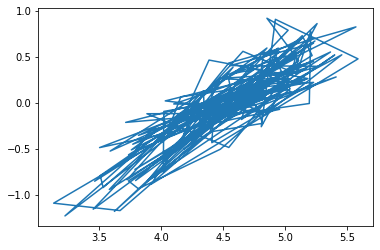

In [ ]:
plt.plot(df_test['sangrur_yield_labels_test'], df_test['diff'])  # Plot the chart
plt.show()  # display